## Chooose a percentile like 0.99 and 0.01

In [ ]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

In [ ]:
df.shape

(10000, 3)

In [ ]:
# let's perform the outlier detection on the height column
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

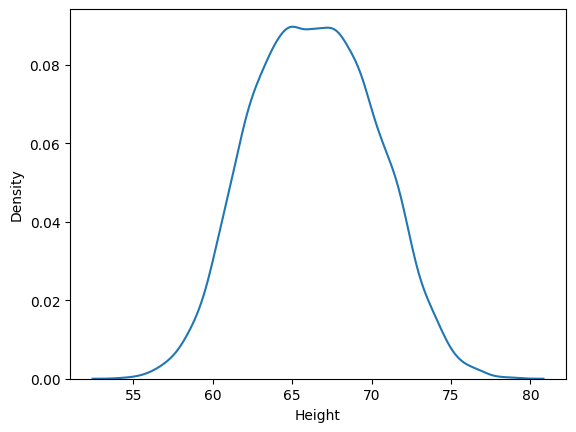

In [ ]:
sns.kdeplot(df['Height'])
plt.show()

<Axes: ylabel='Height'>

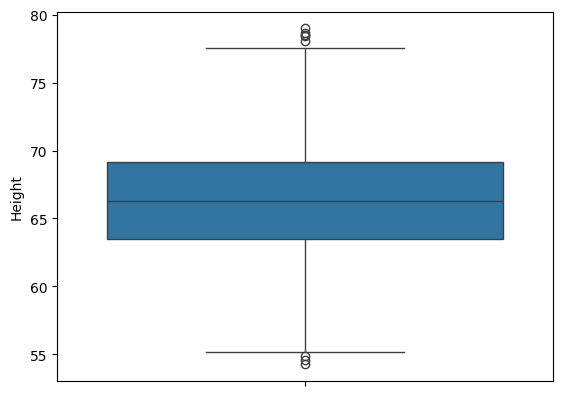

In [ ]:
sns.boxplot(df['Height'])

In [ ]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

upper_limit,lower_limit

(74.7857900583366, 58.13441158671655)

In [ ]:
# let's perform the trimming and see the results
new_df = df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]

<ipython-input-14-cf197601c67e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


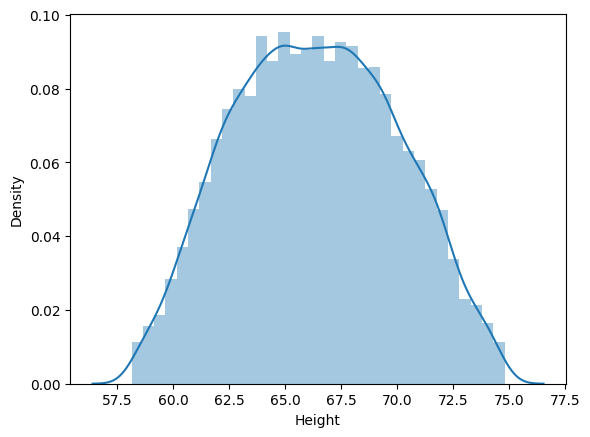

In [ ]:
sns.distplot(new_df['Height'])
plt.show()

<Axes: ylabel='Height'>

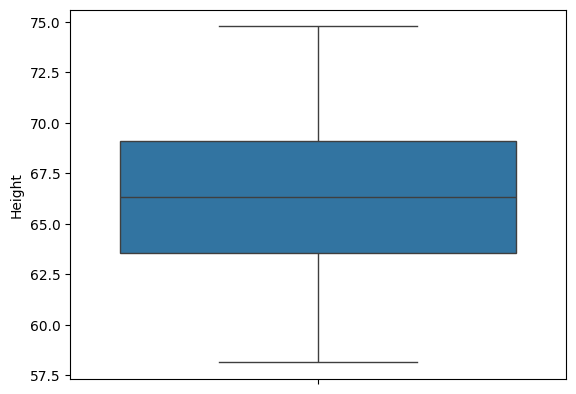

In [ ]:
sns.boxplot(new_df['Height'])

In [ ]:
# Capping or the winaorization
df['Height'] = np.where(df['Height']>=upper_limit,upper_limit,
                        np.where(df['Height']<=lower_limit , lower_limit, df['Height']))

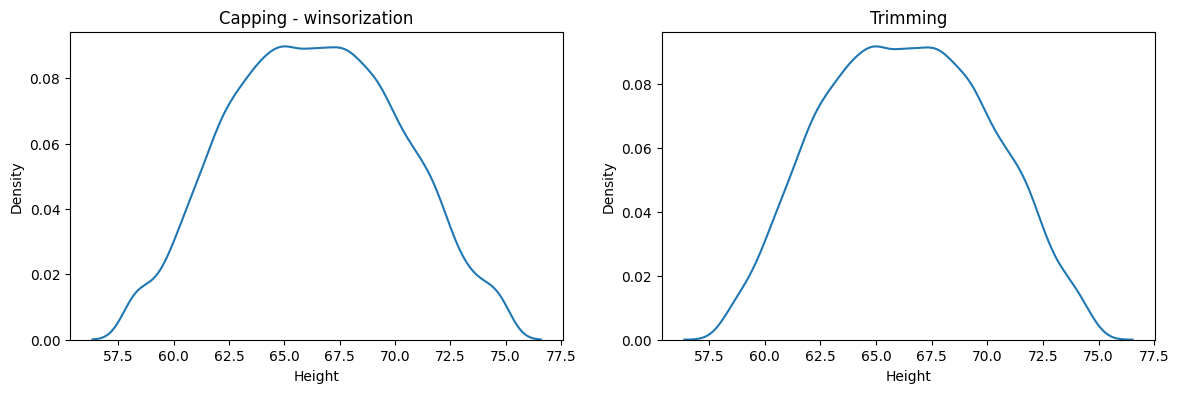

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.kdeplot(df['Height'])
plt.title("Capping - winsorization")

plt.subplot(122)
sns.kdeplot(new_df['Height'])
plt.title("Trimming")

plt.show()

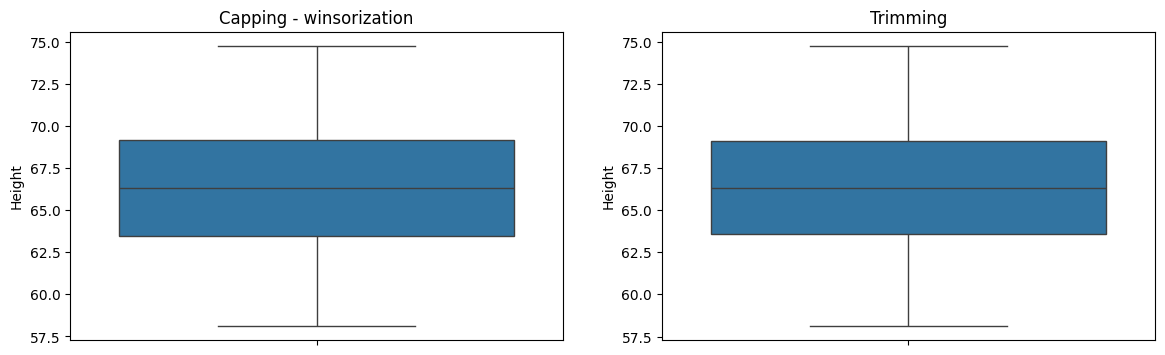

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.boxplot(df['Height'])
plt.title("Capping - winsorization")

plt.subplot(122)
sns.boxplot(new_df['Height'])
plt.title("Trimming")

plt.show()

In [ ]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [ ]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64